### 인공신경망
뇌의 신경세포를 동작을 흉내내는 장치나 소프트웨어를 만들어  
뇌가 수행하는 인지, 사고 능력을 갖춘 기계를 만들기 위한 노력이다.
### 퍼셉트론
신경세포의 신호전달 방식을 모방하여 계산은 수행할 수 있으나, 설계된 동작 외 새로운 학습은 불가능했다.  
이를 변경하여 학습이 가능하게 만든 것이 퍼셉트론으로, 인공지능의 새로운 장을 연 기술로 각광받았다.  
입력노드 => 연결강도 weight에 의해 조정 => 출력노드에 전달 => 전달된 신호를 모두 합한 결과(선형함수)에 따라 활성화함수가 최종 출력 결정(얼마나 강하게 보낼지)
+ 즉, 오차를 줄이도록 weight를 조절해나가는 과정이 학습이다.
+ 모아진 신호를 그대로 내보낸다면 => 활성화함수는 항동함수
+ 일정 수준을 넘어야 다음으로 신호를 내보낸다면 => 계단함수
+ 경사하강법을 통한 최적화가 가능하도록 한다면 => 시그모이드 함수
+ 층을 깊게 쌓은 신경망을 학습 가능하도록 한다면 => ReLU(정류 선형 유닛, rectified linear unit)  등등...

### AND / OR 연산을 수행하는 퍼셉트론

In [34]:
import numpy as np

W, b = np.array([0.5, 0.5]), -0.7   #가중치, 편향

def perceptron(x1, x2):
    x = np.array([x1, x2])
    tmp = np.sum(W * x) + b
    if tmp > 0:
        return 1
    else:
        return -1
    
print('---퍼셉트론으로 구현한 AND 게이트---')
for x in [(-1,-1), (-1,1), (1,-1), (1,1)]:
    y = perceptron(x[0], x[1])
    print('{0: ^10}'.format(str(x)) , '==> ', y)

---퍼셉트론으로 구현한 AND 게이트---
 (-1, -1)  ==>  -1
 (-1, 1)   ==>  -1
 (1, -1)   ==>  -1
  (1, 1)   ==>  1


In [35]:
W, b = np.array([0.7, 0.7]), 0.5    #연결강도 weight와 편향을 조정함으로써 AND, OR 퍼셉트론 구현 가능, but 미리 설계해야함

def perceptron(x1, x2):
    x = np.array([x1, x2])
    tmp = np.sum(W * x) + b
    if tmp > 0:
        return 1
    else:
        return -1
    
print('---퍼셉트론으로 구현한 OR 게이트---')
for x in [(-1,-1), (-1,1), (1,-1), (1,1)]:
    y = perceptron(x[0], x[1])
    print('{0: ^10}'.format(str(x)) , '==> ', y)

---퍼셉트론으로 구현한 OR 게이트---
 (-1, -1)  ==>  -1
 (-1, 1)   ==>  1
 (1, -1)   ==>  1
  (1, 1)   ==>  1


#### 연결강도를 스스로 학습해나가도록 하려면?
### 논리합을 수행하는 퍼셉트론 

In [36]:
W, b = np.array([0, 0]), 0.0
learning_rate = 0.01

def activation(s):   #활성화함수는 계단함수로 작성
    if s > 0:
        return 1
    elif s == 0:
        return 0
    else:
        return -1
    
def out(x):          #활성화함수에 wx+b 넘기는 함수
    return activation(W.dot(x)+ b)

def train(x0, x1, target):
    global W, b
    X = np.array([x0, x1])
    y = out(X)
    
    if target == y:   #정답을 맞혔다면 가중치 수정 불필요
        return False
    
    print(f'가중치 수정 전 target:{target}, y:{y}, b:{b}, W:{W}')   #예측이 틀렸다면 학습 실시
    W = W + learning_rate*X + target
    b = b + learning_rate*1*target
    print(f'가정치 수정 후 target:{target}, y:{y}, b:{b}, W:{W}')
    return True

def predict(inputs):
    outputs = []
    for i in inputs:
        outputs.append(out(i))
    return outputs

In [37]:
adjusted = 0
for i in range(100):
    adjusted += train(-1, -1, -1)
    adjusted += train(-1, 1, 1)
    adjusted += train(1, -1, 1)
    adjusted += train(1, 1, 1)
    print(f'----------iteration{i}----------')
    if not adjusted:   #모든 훈련에 대해 가중치 변화 없으면
        break          #학습 종료
    adjusted = 0

가중치 수정 전 target:-1, y:0, b:0.0, W:[0 0]
가정치 수정 후 target:-1, y:0, b:-0.01, W:[-1.01 -1.01]
가중치 수정 전 target:1, y:-1, b:-0.01, W:[-1.01 -1.01]
가정치 수정 후 target:1, y:-1, b:0.0, W:[-0.02  0.  ]
가중치 수정 전 target:1, y:-1, b:0.0, W:[-0.02  0.  ]
가정치 수정 후 target:1, y:-1, b:0.01, W:[0.99 0.99]
----------iteration0----------
----------iteration1----------


In [38]:
X = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_pred = predict(X)

print('x0 x1  y')
for i in range(len(y_pred)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], y_pred[i]))

x0 x1  y
-1 -1 -1
-1  1  1
 1 -1  1
 1  1  1


### 다양한 논리연산이 가능한 퍼셉트론 훈련하기

In [39]:
#논리곱(conjunction) AND 구현
adjusted = 0
for i in range(100):
    adjusted += train(-1, -1, -1)
    adjusted += train(-1, 1, -1)
    adjusted += train(1, -1, -1)
    adjusted += train(1, 1, 1)
    print(f'----------iteration{i}----------')
    if not adjusted:   #모든 훈련에 대해 가중치 변화 없으면
        break          #학습 종료
    adjusted = 0
    
X = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_pred = predict(X)

print('x0 x1  y')
for i in range(len(y_pred)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], y_pred[i]))

가중치 수정 전 target:-1, y:1, b:0.01, W:[0.99 0.99]
가정치 수정 후 target:-1, y:1, b:0.0, W:[-0.02  0.  ]
가중치 수정 전 target:1, y:-1, b:0.0, W:[-0.02  0.  ]
가정치 수정 후 target:1, y:-1, b:0.01, W:[0.99 1.01]
----------iteration0----------
가중치 수정 전 target:-1, y:1, b:0.01, W:[0.99 1.01]
가정치 수정 후 target:-1, y:1, b:0.0, W:[-0.02  0.02]
가중치 수정 전 target:1, y:0, b:0.0, W:[-0.02  0.02]
가정치 수정 후 target:1, y:0, b:0.01, W:[0.99 1.03]
----------iteration1----------
가중치 수정 전 target:-1, y:1, b:0.01, W:[0.99 1.03]
가정치 수정 후 target:-1, y:1, b:0.0, W:[-0.02  0.04]
----------iteration2----------
가중치 수정 전 target:-1, y:1, b:0.0, W:[-0.02  0.04]
가정치 수정 후 target:-1, y:1, b:-0.01, W:[-1.03 -0.95]
가중치 수정 전 target:1, y:-1, b:-0.01, W:[-1.03 -0.95]
가정치 수정 후 target:1, y:-1, b:0.0, W:[-0.02  0.06]
----------iteration3----------
가중치 수정 전 target:-1, y:1, b:0.0, W:[-0.02  0.06]
가정치 수정 후 target:-1, y:1, b:-0.01, W:[-1.03 -0.93]
가중치 수정 전 target:1, y:-1, b:-0.01, W:[-1.03 -0.93]
가정치 수정 후 target:1, y:-1, b:0.0, W:[-0.02  0.08]
----------i

In [40]:
#NAND 구현
adjusted = 0
for i in range(100):
    adjusted += train(-1, -1, -1)
    adjusted += train(-1, 1, 1)
    adjusted += train(1, -1, 1)
    adjusted += train(1, 1, -1)
    print(f'----------iteration{i}----------')
    if not adjusted:   #모든 훈련에 대해 가중치 변화 없으면
        break          #학습 종료
    adjusted = 0
    
X = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_pred = predict(X)

print('x0 x1  y')
for i in range(len(y_pred)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], y_pred[i]))

가중치 수정 전 target:1, y:-1, b:0.0, W:[-0.02  1.98]
가정치 수정 후 target:1, y:-1, b:0.01, W:[0.99 2.97]
가중치 수정 전 target:-1, y:1, b:0.01, W:[0.99 2.97]
가정치 수정 후 target:-1, y:1, b:0.0, W:[0.   1.98]
----------iteration0----------
가중치 수정 전 target:1, y:-1, b:0.0, W:[0.   1.98]
가정치 수정 후 target:1, y:-1, b:0.01, W:[1.01 2.97]
가중치 수정 전 target:-1, y:1, b:0.01, W:[1.01 2.97]
가정치 수정 후 target:-1, y:1, b:0.0, W:[0.02 1.98]
----------iteration1----------
가중치 수정 전 target:1, y:-1, b:0.0, W:[0.02 1.98]
가정치 수정 후 target:1, y:-1, b:0.01, W:[1.03 2.97]
가중치 수정 전 target:-1, y:1, b:0.01, W:[1.03 2.97]
가정치 수정 후 target:-1, y:1, b:0.0, W:[0.04 1.98]
----------iteration2----------
가중치 수정 전 target:1, y:-1, b:0.0, W:[0.04 1.98]
가정치 수정 후 target:1, y:-1, b:0.01, W:[1.05 2.97]
가중치 수정 전 target:-1, y:1, b:0.01, W:[1.05 2.97]
가정치 수정 후 target:-1, y:1, b:0.0, W:[0.06 1.98]
----------iteration3----------
가중치 수정 전 target:1, y:-1, b:0.0, W:[0.06 1.98]
가정치 수정 후 target:1, y:-1, b:0.01, W:[1.07 2.97]
가중치 수정 전 target:-1, y:1, b:0.01, W:[1

### 퍼셉트론의 XOR
단순한 퍼셉트론에서는 입력노드가 출력으로 바로 연결되어 선형 분리만 가능하다.  
하지만 두 개의 입력에 가중치를 곱하여 얻는 값은 선형함수일 수밖에 없는데  
논리합 OR, 논리곱 AND를 찾는 문제와 달리 XOR의 해가 되는 선형 분리 함수는 존재하지 않는다.  
이 문제를 해결하기 위해 퍼셉트론의 구조를 복잡하게 만들어 XOR 문제를 해결하려고 했다.
+ 입력과 출력을 바로 연결하지 않고, 중간에 신호를 중계하는 신경세포들을 둔다. => 은닉층(hidden layer)
+ 중간에 층을 두고 연결하면 다층 퍼셉트론을 만들 수 있다.

In [41]:
W = np.array([0, 0, 0, 0])
learning_rate = 0.01

def activation(s):
    if s > 1: return 1
    elif s == 0: return 0
    else: return -1
    
def out(polyX):
    return activation(W.dot(polyX))

def train(x0, x1, target):
    global W
    polyX = np.array([x0, x1, x0*x1, 1])
    y = out(polyX)
    
    if target == y: return 0
    print(f'가중치 수정 전 target:{target}, y:{y}, W:{W}')
    W = W + learning_rate*polyX*target
    print(f'가중치 수정 후 target:{target}, y:{y}, W:{W}')
    return 1

def predict(inputs):
    outputs = []
    for i in inputs:
        polyX = np.array([x[0], x[1], x[0]*x[1], 1])
        outputs.append(out(polyX))
    return outputs

In [42]:
adjusted = 0
for i in range(100):
    adjusted += train(-1, -1, -1)
    adjusted += train(-1, 1, 1)
    adjusted += train(1, -1, 1)
    adjusted += train(1, 1, -1)
    print(f'----------iteration{i}----------')
    if not adjusted: break
    adjusted = 0
    
X = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_pred = predict(X)

print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], y_pred[i]))

가중치 수정 전 target:-1, y:0, W:[0 0 0 0]
가중치 수정 후 target:-1, y:0, W:[ 0.01  0.01 -0.01 -0.01]
가중치 수정 전 target:1, y:0, W:[ 0.01  0.01 -0.01 -0.01]
가중치 수정 후 target:1, y:0, W:[ 0.    0.02 -0.02  0.  ]
가중치 수정 전 target:1, y:0, W:[ 0.    0.02 -0.02  0.  ]
가중치 수정 후 target:1, y:0, W:[ 0.01  0.01 -0.03  0.01]
----------iteration0----------
가중치 수정 전 target:1, y:-1, W:[ 0.01  0.01 -0.03  0.01]
가중치 수정 후 target:1, y:-1, W:[ 0.    0.02 -0.04  0.02]
가중치 수정 전 target:1, y:-1, W:[ 0.    0.02 -0.04  0.02]
가중치 수정 후 target:1, y:-1, W:[ 0.01  0.01 -0.05  0.03]
가중치 수정 전 target:-1, y:0, W:[ 0.01  0.01 -0.05  0.03]
가중치 수정 후 target:-1, y:0, W:[ 0.    0.   -0.06  0.02]
----------iteration1----------
가중치 수정 전 target:1, y:-1, W:[ 0.    0.   -0.06  0.02]
가중치 수정 후 target:1, y:-1, W:[-0.01  0.01 -0.07  0.03]
가중치 수정 전 target:1, y:-1, W:[-0.01  0.01 -0.07  0.03]
가중치 수정 후 target:1, y:-1, W:[ 0.    0.   -0.08  0.04]
----------iteration2----------
가중치 수정 전 target:1, y:-1, W:[ 0.    0.   -0.08  0.04]
가중치 수정 후 target:1, y:-1, W

### 다층 퍼셉트론의 학습
오차곡면의 기울기를 연결강도에 대해 구한 뒤, 이 기울기를 따라 내려가는 경사하강법을 사용하여  
연결강도 weight를 조절해 오차를 줄여나갈 수 있게 되고, 복잡한 신경망도 학습이 가능해진다.  
### 오차 역전파
순전파 단계는 입력의 신호가 연결강도로 증폭되고, 활성화 함수를 통과하여 출력노드로 전달되는 과정이다.  
하지만 학습과정은 연결강도를 수정하는 것이기 때문에,  
출력단의 오차가 역방향으로 활성화함수의 미분함수를 거친 후 연결강도에 의해 증폭되어 입력단까지 전달되는 과정이다.  => 오차 역전파
+ 순전파 과정에서 활성화함수를 적용할 때마다 활성화함수의 미분을 구해두기만 한다면,  
오차를 계산하여 순전파와 동일한 신호의 증폭과 합산으로 계산할 수 있다.(방향이 반대일뿐!)
1. 오차(출력과 목표의 벡터차)를 계산한다. 
2. 오차와 통과할 계층에서 미리 계산해 둔 미분치를 곱한다. => 아래 계층으로 전파할 델타가 됨
3. 델타를 이용해 연결강도 weight를 수정한다.  


이런 전파가 모든 계층에서 연쇄적으로 이루어지게 된다.

### 오차의 기울기
    오차의 기울기 = 오차 미분 * 활성화함수 미분 * 입력
기울기의 반대방향으로 weight를 수정해간다.

### XOR 연산이 가능한 다층 퍼셉트론 만들기
1. 입력계층
+ x1, x2
2. 은닉계층
+ h1, h2, h3
3. 출력계층
+ y1, y2

In [43]:
import numpy as np
import matplotlib.pyplot as plt

U = np.random.rand(2, 3)   #연결강도 U
W = np.random.rand(3, 2)   #연결강도 W
learning_rate = 1.0

In [44]:
def sigmoid(v):                 #활성화함수 : 시그모이드 함수
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):      #활성화함수의 미분함수
    s = sigmoid(v)
    return s * (1-s)

In [45]:
input = np.zeros(2)    #(2,)의 2차원 벡터

#(3,)의 3차원 벡터, 순전파 시 계산될 값들
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)  #입력에서 넘어온 신호 합산한 sum, 활성화함수 거친 out, 활성화함수의 미분함수를 거친 deriv

#(3,)의 3차원 벡터, 역전파 시 계산될 값들
h_error, h_delta = np.zeros(3), np.zeros(3)  #역전파 단계에서 넘겨받을 오차 error, 은닉계층이 아래로 내려보낼 델타 벡터 delta)

#(2,)의 2차원 벡터, 순전파 시 계산될 값들
yy_error, y_delta = np.zeros(2), np.zeros(2)                   

#(2,)의 2차원 벡터, 역전파 시 계산될 값들
y_error, y_delta = np.zeros(2), np.zeros(2)                    

In [46]:
#입력을 은닉층으로 전파하는 순전파 과정을 함수로 구현
def forward_xh(x):
    global input, h_sum, h_out, h_deriv
    input = x
    h_sum = U.T.dot(input)
    h_out = sigmoid(h_sum)
    h_deriv = derivative_sigmoid(h_sum)
    
#은닉층에서 출력층으로 전파하는 순전파 과정을 함수로 구현
def forward_hy():
    global y_sum, y_out, y_deriv
    y_sum = W.T.dot(h_out)
    y_out = sigmoid(y_sum)
    y_deriv = derivative_sigmoid(y_sum)
    
#출력을 목표와 비교해 오차를 구하는 함수 구현
def compute_error(target):
    return y_out - target

In [47]:
#역전파 과정 함수로 구현
def backward_y(error):
    global y_error, y_delta, W   
    y_error = error
    y_delta = y_deriv * y_error    #오차 * 미분치 = 아래 계층으로 내려보낼 델타 벡터
    
    #weight 업데이트
    dW = -(learning_rate * np.outer(h_out, y_delta))    #h_out, y_delta 행렬을 외부곱
    W = W + dW
    
#은닉계층의 역전파 함수로 구현
def backward_h():
    global h_error, h_delta, U
    h_error = W.dot(y_delta)       #오차 = 출력계층에서 뒤로 넘겨준 델타벡터 * 두 계층을 연결하는 연결벡터 행렬
    h_delta = h_deriv * h_error
    
    #weight 업데이트
    dU = -(learning_rate * np.outer(input, h_delta)) 
    U = U + dU

In [48]:
#퍼셉트론 훈련 함수 작성
def train(x, target):  #입력, 목표 필요
    forward_xh(x)
    forward_hy()
    e = compute_error(target)
    backward_y(e)
    backward_h()
    return e**2

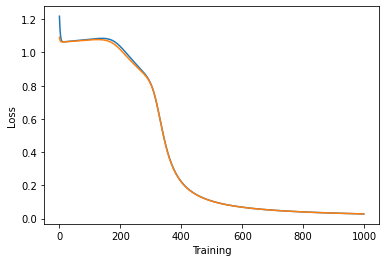

In [49]:
#1000번 훈련해보기
loss = []    #(2,) * 1000

for i in range(1000):
    e_accum = 0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)
    e_accum += train(np.array([1,0]), true)
    e_accum += train(np.array([0,1]), true)
    e_accum += train(np.array([1,1]), false)
    loss.append(e_accum)
                
plt.plot(loss)
plt.xlabel('Training')
plt.ylabel('Loss');   #파랑, 주황 선은 y1, y2 출력노드의 오차로, 훈련이 반복될수록 0에 가까워짐

In [50]:
def test(X):
    y_pred = []
    for x in X:   #입력데이터 각각에 대해 순전파 실시, 얻은 출력을 y_pred에 모음
        forward_xh(x)
        forward_hy()
        y_pred.append(y_out)
    return y_pred

In [51]:
test(np.array([[0,0], [0,1], [1,0], [1,1]]))   #정답은 F/T/T/F, 각각 0.88, 0.92, 0.92, 0.96의 확률로 XOR 연산을 잘 해냄

[array([0.12281936, 0.87729516]),
 array([0.92302256, 0.07689622]),
 array([0.92361182, 0.07630945]),
 array([0.03789893, 0.96216566])]

### 다층 퍼셉트론으로 비선형 회귀 구현하기


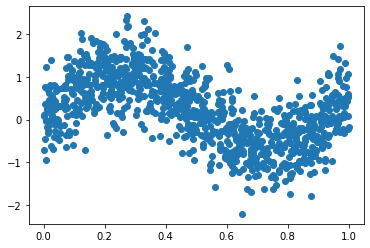

In [52]:
import pandas as pd

url = 'https://github.com/dknife/ML/raw/main/data/nonlinear.csv'
df = pd.read_csv(url)
plt.scatter(df.x, df.y);

In [53]:
nx, nh1, nh2, ny = 1, 6, 4, 1    #입력층, 은닉층1, 은닉층2, 출력층의 노드 개수

#층이 4개이므로 연결강도는 3개 필요
U = np.random.randn(nx, nh1) * 2
V = np.random.randn(nh1, nh2) * 2
W = np.random.randn(nh2, ny) * 2

learning_rate = 0.1

In [54]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

In [55]:
input = np.zeros(nx)

h1_out, h1_deriv = np.zeros(nh1), np.zeros(nh1)   #순전파 시 계산
h1_delta = np.zeros(nh1)                          #역전파 시 계산

h2_out, h2_deriv = np.zeros(nh2), np.zeros(nh2)   #순전파 시 계산
h2_delta = np.zeros(nh2)                          #역전파 시 계산

y_out, y_deriv = np.zeros(ny), np.zeros(ny)       #순전파 시 계산
y_delta = np.zeros(ny)                            #역전파 시 계산

In [56]:
def forward(x):
    global input, h1_out, h1_deriv, h2_out, h2_deriv, y_out, y_deriv
    input = x
    h1_out = sigmoid(U.T.dot(input))      #은닉층1로 전파
    h1_deriv = h1_out * (1-h1_out)        #은닉층1의 미분
    
    h2_out = sigmoid(V.T.dot(h1_out))     #은닉층2로 전파
    h2_deriv = h2_out * (1-h2_out)        #은닉층2의 미분
    
    y_out = sigmoid(W.T.dot(h2_out))      #출력층으로 전파
    y_deriv = y_out * (1-y_out)           #출력층의 미분

In [57]:
def compute_error(target):
    return y_out - target

In [58]:
def backward(error):
    global y_delta, W, h2_delta, V, h1_delta, U
    y_delta = y_deriv * error                            #출력층의 델타
    dW = -(learning_rate * np.outer(h2_out, y_delta))    #W 업데이트
    W = W + dW
    
    h2_delta = h2_deriv * W.dot(y_delta)                 #은닉층2의 델타
    dV = -(learning_rate * np.outer(h1_out, h2_delta))   #V 업데이트
    V = V + dV
    
    h1_delta = h1_deriv * V.dot(h2_delta)                #은닉층1의 델타
    dU = -(learning_rate * np.outer(input, h1_delta))    #U 업데이트

In [59]:
def train(x, target):
    forward(x)
    e = compute_error(target)
    backward(e)
    return e ** 2

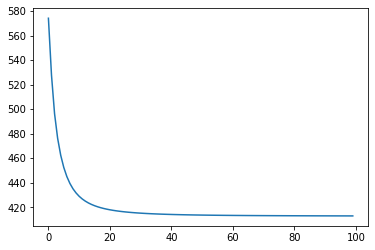

In [60]:
loss = []

X = df.x.to_numpy()
y_label = df.y.to_numpy()

for i in range(100):
    e_accum = 0
    for x, y in zip(X, y_label):
        e_accum += train(x, y)
    loss.append(e_accum)
    
error_log = np.array(loss).flatten()
plt.plot(error_log);

In [61]:
def predict(X):
    y_pred = []
    for x in X:
        forward(x)
        y_pred.append(y_out)
    return y_pred

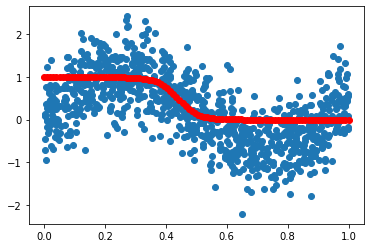

In [62]:
new_data = np.linspace(0, 1, 100).reshape(-1,1)    #2차원 벡터로 변형
y_pred = predict(new_data)

plt.scatter(df.x, df.y)
plt.scatter(new_data, y_pred, color='r');

## TensorFlow
위에서 직접 구현했던 신경망을 효율적으로 구현할 수 있는 도구이다.  
구글에서 만든 것으로, Keras라는 심층신경망 구현을 위한 api을 포함한다.  

In [75]:
import tensorflow as tf
from tensorflow import keras

#입력층은 제외, 모든 층이 앞뒤 층의 모든 노드와 연결되어 있는 밀집(Dense)계층으로 표현됨
model = keras.models.Sequential([keras.layers.Dense(6, activation='sigmoid'),
                                 keras.layers.Dense(4, activation='sigmoid'),
                                 keras.layers.Dense(1, activation='sigmoid')])


#### 최적화 방법 결정 
확률적 경사하강법(SGD, stochastic gradient descent)
+ 전체 데이터가 아닌, 임의로 선택된 데이터 인스턴스만을 가지고 경사하강법을 적용
+ 가중치 조절 속도가 개선되는 효과

#### 모델
+ 사용 전 세팅(compile) : 최적화 방법 지정, 오차측정 기준 지정
+ 훈련(fit) : 입력과 레이블 지정, epoch 지정

In [76]:
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

In [77]:
url = 'https://github.com/dknife/ML/raw/main/data/nonlinear.csv'
df = pd.read_csv(url)

X = df.x.to_numpy().reshape(-1,1)
y_label  = df.y.to_numpy()

model.fit(X, y_label, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6257
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6155
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5954
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4702
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4333
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4156
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4105
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4049
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4034
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4055
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4050
Epoch 13/100
32/32 [=================

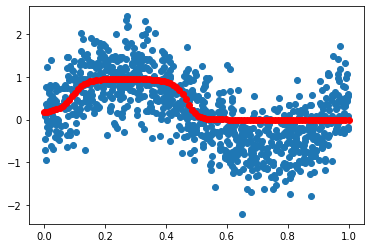

In [78]:
new_data = np.linspace(0, 1, 100).reshape(-1,1)
y_pred = model.predict(new_data)

plt.title(f'learning_rate={learning_rate}')
plt.scatter(df.x, df.y)
plt.scatter(new_data, y_pred, color='r');

#### 다양한 활성화함수, 학습률 비교

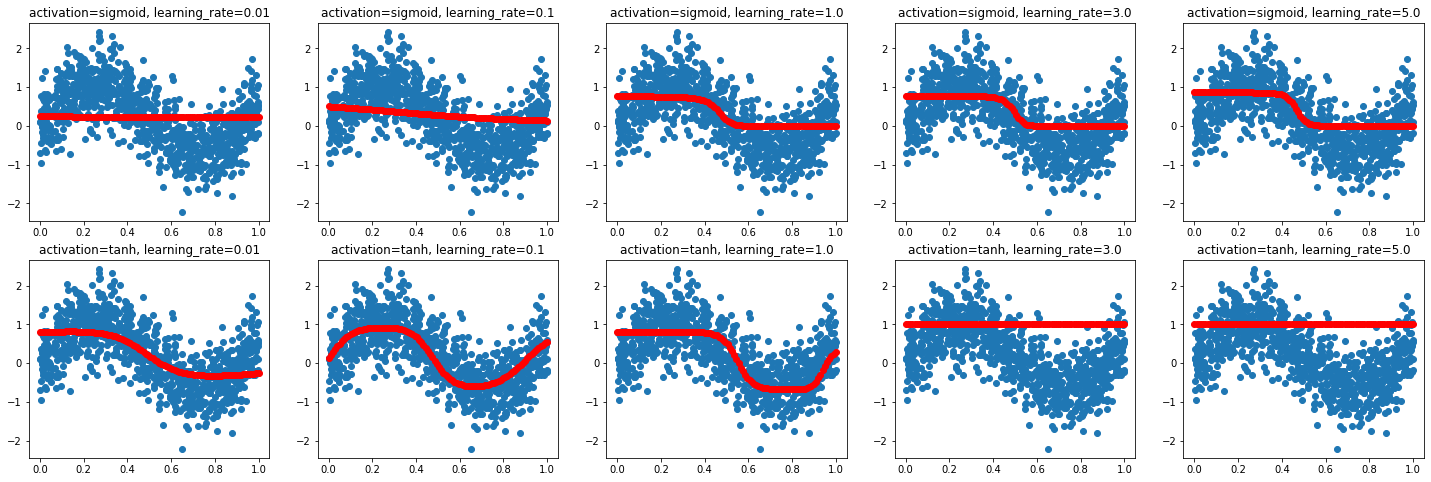

In [87]:
from tabnanny import verbose


url = 'https://github.com/dknife/ML/raw/main/data/nonlinear.csv'
df = pd.read_csv(url)

X = df.x.to_numpy().reshape(-1,1)
y_label  = df.y.to_numpy()

activation_functions = ['sigmoid', 'tanh']
learning_rates = [0.01, 0.1, 1.0, 3.0, 5.0]

plt.figure(figsize=(25,8))

for i, activation in enumerate(activation_functions):
    for j, learning_rate in enumerate(learning_rates):
        model = keras.models.Sequential([keras.layers.Dense(6, activation=activation),
                                         keras.layers.Dense(4, activation=activation),
                                         keras.layers.Dense(1, activation=activation)])
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='mse')
        model.fit(X, y_label, epochs=100, verbose=0)
        
        new_data = np.linspace(0, 1, 100).reshape(-1,1)
        y_pred = model.predict(new_data)

        plt.subplot(2, 5, i*5+j+1)
        plt.title(f'activation={activation}, learning_rate={learning_rate}')
        plt.scatter(df.x, df.y)
        plt.scatter(new_data, y_pred, color='r');   #tanh, 0.1일 때 가장 잘 예측함